In [ ]:
#Download Filings
from sec_edgar_downloader import Downloader
#This will download all of the filings pulled into an assigned folder
dl = Downloader("INSERT DOWNLOAD DIRECTORY HERE (ABSOLUTE PATHWAY)")
import os
from bs4 import BeautifulSoup

#This generates a list of all companies in the S&P 500, note that the "Tickers" variable can be altered to include as many or as few companies as desired
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
Tickers  = list(df["Symbol"])

#Note there are many possible filing types available at: https://pypi.org/project/sec-edgar-downloader/
Entry_type = "10-Q"
dic = {}

for Ticker in Tickers:
    try:
        dl.get(Entry_type, Ticker, amount = 1)
        company_filing = os.listdir('INSERT DOWNLOAD DIRECTORY HERE (ABSOLUTE PATHWAY)/sec-edgar-filings/{}/{}'.format(Ticker, Entry_type))

        def related_party_extraction(Ticker):
            with open('INSERT DOWNLOAD DIRECTORY HERE (ABSOLUTE PATHWAY)/sec-edgar-filings/{}/{}/{}/filing-details.html'.format(Ticker, Entry_type, company_filing[0])) as file:
                soup = BeautifulSoup(file, 'lxml')
            text_pieces = soup.find_all("div")
            Related_parties = 0
            for i in text_pieces:
                if "related party" in i.text:
                    Related_parties+=1
            return Related_parties
        dic[Ticker] = related_party_extraction(Ticker)
        print(Ticker)
    except:
        dic[Ticker]=0


In [31]:
dataset = sorted(dic.items(), key=lambda item: item[1])[::-1]
top_10 = dataset[:10]

In [45]:
top_10_tickers = [point[0] for point in top_10]
top_10_rps = [point[1] for point in top_10]

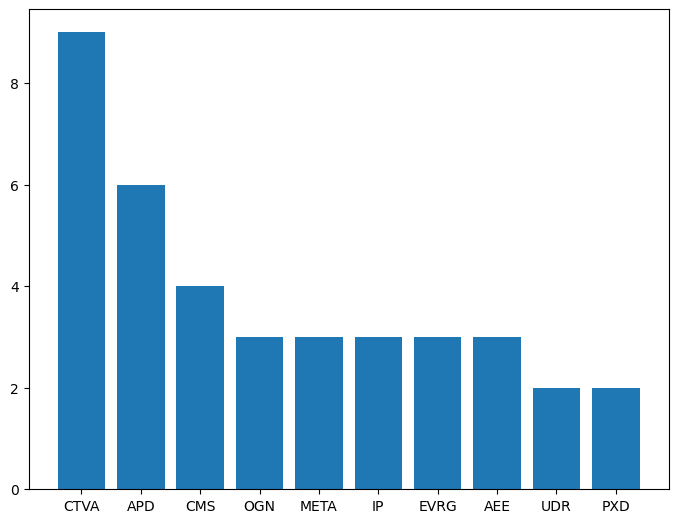

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(top_10_tickers,top_10_rps)
plt.show()